# Manually creating a Dataframe or Series

In [1]:
import pandas as pd

In [2]:
# Manually creating a series
students = ['Alice', 'Jack', 'Molly']

# Now we just call the Series function in pandas and pass in the students
pd.Series(students)

0    Alice
1     Jack
2    Molly
dtype: object

In [3]:
numbers = [1, 2, 3]
# And turn that into a series
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [4]:
#creating series with a specific index
s = pd.Series(['Physics', 'Chemistry', 'English'], index=['Alice', 'Jack', 'Molly'])
s

Alice      Physics
Jack     Chemistry
Molly      English
dtype: object

In [5]:
#Creating a series with specific index but using a dictionary
students_scores = {'Alice': 'Physics',
                   'Jack': 'Chemistry',
                   'Molly': 'English'}
# When I create the series object though I'll only ask for an index with three students, and
# excluding Jack
s = pd.Series(students_scores, index=['Alice', 'Molly', 'Sam'])
s

Alice    Physics
Molly    English
Sam          NaN
dtype: object

In [6]:
s[2]

nan

In [7]:
#One could use loc definitions to access the data
print(s.loc['Molly'],s['Molly'])

English English


## Concatenation and non-unique indexes

In [8]:
# Up until now I've shown only examples of a series where the index values were unique. I want 
# to end this section by showing an example where index values are not unique, and this makes 
# pandas Series a little different conceptually then, for instance, a relational database.

# Lets create a Series with students and the courses which they have taken
students_classes = pd.Series({'Alice': 'Physics',
                   'Jack': 'Chemistry',
                   'Molly': 'English',
                   'Sam': 'History'})
students_classes

Alice      Physics
Jack     Chemistry
Molly      English
Sam        History
dtype: object

In [9]:
# Now lets create a Series just for some new student Kelly, which lists all of the courses
# she has taken. We'll set the index to Kelly, and the data to be the names of courses.
kelly_classes = pd.Series(['Philosophy', 'Arts', 'Math'], index=['Kelly', 'Kelly', 'Kelly'])
kelly_classes

Kelly    Philosophy
Kelly          Arts
Kelly          Math
dtype: object

In [10]:
# Finally, we can append all of the data in this new Series to the first using the .append()
# function.
all_students_classes = pd.concat([students_classes,kelly_classes])

# This creates a series which has our original people in it as well as all of Kelly's courses
all_students_classes

Alice       Physics
Jack      Chemistry
Molly       English
Sam         History
Kelly    Philosophy
Kelly          Arts
Kelly          Math
dtype: object

In [11]:
all_students_classes['Kelly']

Kelly    Philosophy
Kelly          Arts
Kelly          Math
dtype: object

## Question: Why is it important to be aware of non-unique indexes when concatenating DataFrames? What issues might arise if indexes are not unique?


# Dataframes

In [12]:
students = [{'Name': 'Alice',
              'Class': 'Physics',
              'Score': 85},
            {'Name': 'Jack',
             'Class': 'Chemistry',
             'Score': 82},
            {'Name': 'Helen',
             'Class': 'Biology',
             'Score': 90}]

# Then we pass this list of dictionaries into the DataFrame function
df = pd.DataFrame(students, index=['school1', 'school2', 'school1'])
# And lets print the head again
df.head()


,Name,Class,Score
school1,Alice,Physics,85
school2,Jack,Chemistry,82
school1,Helen,Biology,90


In [13]:
# Similar to the series, we can extract data using the .iloc and .loc attributes. Because the 
# DataFrame is two-dimensional, passing a single value to the loc indexing operator will return 
# the series if there's only one row to return.

# For instance, if we wanted to select data associated with school2, we would just query the 
# .loc attribute with one parameter.
df.loc['school2']

# You'll note that the name of the series is returned as the index value, while the column 
# name is included in the output.

Name          Jack
Class    Chemistry
Score           82
Name: school2, dtype: object

## Common misconceptions, question time

In [14]:
#Why does the following command fails?
#df['school2']

## Question: What are the differences between a Pandas Series and a DataFrame? Can you give an example of when you might use each?

In [15]:
# We can check the data type of the return using the python type function.
type(df.loc['school2'])

pandas.core.series.Series

In [16]:
# It's important to remember that the indices and column names along either axes horizontal or 
# vertical, could be non-unique. In this example, we see two records for school1 as different rows.
# If we use a single value with the DataFrame lock attribute, multiple rows of the DataFrame will 
# return, not as a new series, but as a new DataFrame.

# Lets query for school1 records
df.loc['school1']

,Name,Class,Score
school1,Alice,Physics,85
school1,Helen,Biology,90


In [17]:
# One of the powers of the Panda's DataFrame is that you can quickly select data based on multiple axes.
# For instance, if you wanted to just list the student names for school1, you would supply two 
# parameters to .loc, one being the row index and the other being the column name.

# For instance, if we are only interested in school1's student names
# Important to note, it only works with different axes, i.e., an index (one type of the rows) and a column

df.loc['school1', 'Name']

school1    Alice
school1    Helen
Name: Name, dtype: object

In [18]:
# Remember, just like the Series, the pandas developers have implemented this using the indexing
# operator and not as parameters to a function.

# What would we do if we just wanted to select a single column though? Well, there are a few
# mechanisms. Firstly, we could transpose the matrix. This pivots all of the rows into columns
# and all of the columns into rows, and is done with the T attribute
df.T

,school1,school2,school1
Name,Alice,Jack,Helen
Class,Physics,Chemistry,Biology
Score,85,82,90


In [19]:
# Then we can call .loc on the transpose to get the student names only
df.T.loc['Name']

school1    Alice
school2     Jack
school1    Helen
Name: Name, dtype: object

In [20]:
# However, since iloc and loc are used for row selection, Panda reserves the indexing operator 
# directly on the DataFrame for column selection. In a Panda's DataFrame, columns always have a name. 
# So this selection is always label based, and is not as confusing as it was when using the square 
# bracket operator on the series objects. For those familiar with relational databases, this operator 
# is analogous to column projection.
df['Name']

school1    Alice
school2     Jack
school1    Helen
Name: Name, dtype: object

In [21]:
# You can select multiple columns if you put them in a list.
df[['Name','Class']]

,Name,Class
school1,Alice,Physics
school2,Jack,Chemistry
school1,Helen,Biology


## Interacting with dataframes

In [22]:
# Before we leave the discussion of accessing data in DataFrames, lets talk about dropping data.
# It's easy to delete data in Series and DataFrames, and we can use the drop function to do so. 
# This function takes a single parameter, which is the index or row label, to drop. This is another 
# tricky place for new users -- the drop function doesn't change the DataFrame by default! Instead,
# the drop function returns to you a copy of the DataFrame with the given rows removed.

df.drop('school1')

,Name,Class,Score
school2,Jack,Chemistry,82


In [23]:
# But if we look at our original DataFrame we see the data is still intact.
df

,Name,Class,Score
school1,Alice,Physics,85
school2,Jack,Chemistry,82
school1,Helen,Biology,90


In [24]:
# Drop has two interesting optional parameters. The first is called inplace, and if it's 
# set to true, the DataFrame will be updated in place, instead of a copy being returned. 
# The second parameter is the axes, which should be dropped. By default, this value is 0, 
# indicating the row axis. But you could change it to 1 if you want to drop a column.

# For example, lets make a copy of a DataFrame using .copy()
copy_df = df.copy()
# Now lets drop the name column in this copy
copy_df.drop("Name", inplace=True, axis=1)
copy_df

,Class,Score
school1,Physics,85
school2,Chemistry,82
school1,Biology,90


In [25]:
# There is a second way to drop a column, and that's directly through the use of the indexing 
# operator, using the del keyword. This way of dropping data, however, takes immediate effect 
# on the DataFrame and does not return a view.
del copy_df['Class']
copy_df

,Score
school1,85
school2,82
school1,90


In [26]:
# Finally, adding a new column to the DataFrame is as easy as assigning it to some value using
# the indexing operator. For instance, if we wanted to add a class ranking column with default 
# value of None, we could do so by using the assignment operator after the square brackets.
# This broadcasts the default value to the new column immediately.

df['ClassRanking'] = None
df

,Name,Class,Score,ClassRanking
school1,Alice,Physics,85,None
school2,Jack,Chemistry,82,None
school1,Helen,Biology,90,None


In [27]:
# Pandas mades it easy to turn a CSV into a dataframe, we just call read_csv()
#df = pd.read_csv('Admission_Predict.csv')
df = pd.read_csv('https://raw.githubusercontent.com/calovids/IMPRS-Python-Workshop/main/data/Admission_Predict.csv')

# And let's look at the first few rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
# We notice that by default index starts with 0 while the students' serial number starts from 1. If you jump
# back to the CSV output you'll deduce that pandas has create a new index. Instead, we can set the serial no.
# as the index if we want to by using the index_col.
#df = pd.read_csv('Admission_Predict.csv', index_col=0)
df = pd.read_csv('https://raw.githubusercontent.com/calovids/IMPRS-Python-Workshop/main/data/Admission_Predict.csv', index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


### Renaming variables

In [29]:
# Notice that we have two columns "SOP" and "LOR" and probably not everyone knows what they mean So let's
# change our column names to make it more clear. In Pandas, we can use the rename() function It takes a
# parameter called columns, and we need to pass into a dictionary which the keys are the old column name and
# the value is the corresponding new column name
new_df=df.rename(columns={'SOP': 'Statement of Purpose',
                          'LOR': 'Letter of Recommendation'})
new_df.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
#Note that it didn't seem to change the LOR variable, let's have a look why:
new_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [31]:
# We can create some function that does the cleaning of variables and then tell renamed to apply that function
# across all of the data. Python comes with a handy string function to strip white space called "strip()".
# When we pass this in to rename we pass the function as the mapper parameter, and then indicate whether the
# axis should be columns or index (row labels)
new_df=new_df.rename(mapper=str.strip, axis='columns')
# Let's take a look at results
new_df.head()

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
new_df=new_df.rename(columns={'SOP': 'Statement of Purpose',
                              'LOR': 'Letter of Recommendation'})
new_df.head()
#let's save this for later:
AdmissionDF=new_df.copy()

In [33]:
# One nice feature of Pandas is multi-level indexing. This is similar to composite keys in 
# relational database systems. To create a multi-level index, we simply call set index and 
# give it a list of columns that we're interested in promoting to an index.

# Pandas will search through these in order, finding the distinct data and form composite indices.
# A good example of this is often found when dealing with geographical data which is sorted by 
# regions or demographics.

# Let's change data sets and look at some census data for a better example. This data is stored in 
# the file census.csv and comes from the United States Census Bureau. In particular, this is a 
# breakdown of the population level data at the US county level. It's a great example of how 
# different kinds of data sets might be formatted when you're trying to clean them.

# Let's import and see what the data looks like
#df = pd.read_csv('census.csv')
df = pd.read_csv('https://raw.githubusercontent.com/calovids/IMPRS-Python-Workshop/main/data/census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [34]:
print(df['SUMLEV'].unique())
#Keeping only the information that is not summarized by state
df=df[df['SUMLEV'] == 50]
df.head()

[40 50]


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


### Dual indexing

In [35]:
# The US Census data breaks down population estimates by state and county. We can load the data and 
# set the index to be a combination of the state and county values and see how pandas handles it in 
# a DataFrame. We do this by creating a list of the column identifiers we want to have indexed. And then 
# calling set index with this list and assigning the output as appropriate. We see here that we have 
# a dual index, first the state name and second the county name.

df_state = df.set_index(['STNAME', 'CTYNAME'])
df_state.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County          54571              54571            54660   
        Baldwin County         182265             182265           183193   
        Barbour County          27457              27457            27341   
        Bibb County             22915              22919            22861   
        Blount County           57322              57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                           ...   
Alabama Autauga County            55253            55175  ...   
        Baldwin County           186659           190396  ...   
        Barbour County            27226            27159  ...   
        Bibb County               22733            22642  ...   
        Blount County             57711            57776  ...   

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

### Masks and conditional filtering

In [36]:
#We can also create conditional masks according to the data
admit_mask=df_state['ESTIMATESBASE2010'] > 28000
admit_mask

STNAME   CTYNAME          
Alabama  Autauga County        True
         Baldwin County        True
         Barbour County       False
         Bibb County          False
         Blount County         True
                              ...  
Wyoming  Sweetwater County     True
         Teton County         False
         Uinta County         False
         Washakie County      False
         Weston County        False
Name: ESTIMATESBASE2010, Length: 3142, dtype: bool

In [37]:
# So, what do you do with the boolean mask once you have formed it? Well, you can just lay it on top of the
# data to "hide" the data you don't want, which is represented by all of the False values. We do this by using
# the .where() function on the original DataFrame.
df_state.where(admit_mask)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County        NaN     NaN       NaN    NaN     NaN   
        Bibb County           NaN     NaN       NaN    NaN     NaN   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County          NaN     NaN       NaN    NaN     NaN   
        Uinta County          NaN     NaN       NaN    NaN     NaN   
        Washakie County       NaN     NaN       NaN    NaN     NaN   
        Weston County         NaN     NaN       NaN    NaN     NaN   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County               NaN                NaN              NaN   
        Bibb County                  NaN                NaN              NaN   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County                 NaN                NaN              NaN   
        Uinta County                 NaN                NaN              NaN   
        Washakie County              NaN                NaN              NaN   
        Weston County                NaN                NaN              NaN   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County                 NaN              NaN  ...   
        Bibb County                    NaN              NaN  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County                   NaN              NaN  ...   
        Uinta County                   NaN              NaN  ...   
        Washakie County                NaN              NaN  ...   
        Weston County                  NaN              NaN  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County                  NaN               NaN   
        Bibb County                     NaN               NaN   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County                    NaN               NaN   
        Uinta County                    NaN               NaN   
        Washakie County                 NaN               NaN   
        Weston County                   NaN               NaN   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County                  NaN               NaN   
        Bibb County

In [38]:
#But that looks very messy, we can drop all the NaN entries:
df_state.where(admit_mask).dropna()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
        Calhoun County       50.0     3.0       6.0    1.0    15.0   
        Chambers County      50.0     3.0       6.0    1.0    17.0   
...                           ...     ...       ...    ...     ...   
Wyoming Laramie County       50.0     4.0       8.0   56.0    21.0   
        Natrona County       50.0     4.0       8.0   56.0    25.0   
        Park County          50.0     4.0       8.0   56.0    29.0   
        Sheridan County      50.0     4.0       8.0   56.0    33.0   
        Sweetwater County    50.0     4.0       8.0   56.0    37.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Blount County            57322.0            57322.0          57373.0   
        Calhoun County          118572.0           118586.0         118437.0   
        Chambers County          34215.0            34170.0          34098.0   
...                                  ...                ...              ...   
Wyoming Laramie County           91738.0            91881.0          92271.0   
        Natrona County           75450.0            75450.0          75472.0   
        Park County              28205.0            28205.0          28259.0   
        Sheridan County          29116.0            29116.0          29146.0   
        Sweetwater County        43806.0            43806.0          43593.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Blount County              57711.0          57776.0  ...   
        Calhoun County            117768.0         117286.0  ...   
        Chambers County            33993.0          34075.0  ...   
...                                    ...              ...  ...   
Wyoming Laramie County             92663.0          94894.0  ...   
        Natrona County             76420.0          78699.0  ...   
        Park County                28473.0          28863.0  ...   
        Sheridan County            29275.0          29594.0  ...   
        Sweetwater County          44041.0          45104.0  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Blount County              1.807375         -1.177622   
        Calhoun County            -6.155670         -4.611706   
        Chambers County           -2.731639          3.849092   
...                                     ...               ...   
Wyoming Laramie County            -1.200428         15.547274   
        Natrona County             7.189319         23.066162   
        Park County                4.582951          8.057765   
        Sheridan County            0.958559          8.425487   
        Sweetwater County          1.072643         16.243199   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Blount County             -1.748766         -2.062535   
        Calhoun Cou

In [39]:
#Or, much more commonly used:
df_state[admit_mask]

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Blount County          50       3         6      1       9   
        Calhoun County         50       3         6      1      15   
        Chambers County        50       3         6      1      17   
...                           ...     ...       ...    ...     ...   
Wyoming Laramie County         50       4         8     56      21   
        Natrona County         50       4         8     56      25   
        Park County            50       4         8     56      29   
        Sheridan County        50       4         8     56      33   
        Sweetwater County      50       4         8     56      37   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Blount County              57322              57322            57373   
        Calhoun County            118572             118586           118437   
        Chambers County            34215              34170            34098   
...                                  ...                ...              ...   
Wyoming Laramie County             91738              91881            92271   
        Natrona County             75450              75450            75472   
        Park County                28205              28205            28259   
        Sheridan County            29116              29116            29146   
        Sweetwater County          43806              43806            43593   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Blount County                57711            57776  ...   
        Calhoun County              117768           117286  ...   
        Chambers County              33993            34075  ...   
...                                    ...              ...  ...   
Wyoming Laramie County               92663            94894  ...   
        Natrona County               76420            78699  ...   
        Park County                  28473            28863  ...   
        Sheridan County              29275            29594  ...   
        Sweetwater County            44041            45104  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Blount County              1.807375         -1.177622   
        Calhoun County            -6.155670         -4.611706   
        Chambers County           -2.731639          3.849092   
...                                     ...               ...   
Wyoming Laramie County            -1.200428         15.547274   
        Natrona County             7.189319         23.066162   
        Park County                4.582951          8.057765   
        Sheridan County            0.958559          8.425487   
        Sweetwater County          1.072643         16.243199   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Blount County             -1.748766         -2.062535   
        Calhoun Cou

In [40]:
#Also very common, but more messy
df_state[df_state['ESTIMATESBASE2010'] > 28000]

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Blount County          50       3         6      1       9   
        Calhoun County         50       3         6      1      15   
        Chambers County        50       3         6      1      17   
...                           ...     ...       ...    ...     ...   
Wyoming Laramie County         50       4         8     56      21   
        Natrona County         50       4         8     56      25   
        Park County            50       4         8     56      29   
        Sheridan County        50       4         8     56      33   
        Sweetwater County      50       4         8     56      37   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Blount County              57322              57322            57373   
        Calhoun County            118572             118586           118437   
        Chambers County            34215              34170            34098   
...                                  ...                ...              ...   
Wyoming Laramie County             91738              91881            92271   
        Natrona County             75450              75450            75472   
        Park County                28205              28205            28259   
        Sheridan County            29116              29116            29146   
        Sweetwater County          43806              43806            43593   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Blount County                57711            57776  ...   
        Calhoun County              117768           117286  ...   
        Chambers County              33993            34075  ...   
...                                    ...              ...  ...   
Wyoming Laramie County               92663            94894  ...   
        Natrona County               76420            78699  ...   
        Park County                  28473            28863  ...   
        Sheridan County              29275            29594  ...   
        Sweetwater County            44041            45104  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Blount County              1.807375         -1.177622   
        Calhoun County            -6.155670         -4.611706   
        Chambers County           -2.731639          3.849092   
...                                     ...               ...   
Wyoming Laramie County            -1.200428         15.547274   
        Natrona County             7.189319         23.066162   
        Park County                4.582951          8.057765   
        Sheridan County            0.958559          8.425487   
        Sweetwater County          1.072643         16.243199   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Blount County             -1.748766         -2.062535   
        Calhoun Cou

In [41]:
#Multiple conditions can quickly get out of hand for readability, also not different way to express conditions
df_state[ (df_state['STATE'] > 50) & (df_state['ESTIMATESBASE2010']>28000)]

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME   CTYNAME                                                      
Virginia Accomack County        50       3         5     51       1   
         Albemarle County       50       3         5     51       3   
         Amherst County         50       3         5     51       9   
         Arlington County       50       3         5     51      13   
         Augusta County         50       3         5     51      15   
...                            ...     ...       ...    ...     ...   
Wyoming  Laramie County         50       4         8     56      21   
         Natrona County         50       4         8     56      25   
         Park County            50       4         8     56      29   
         Sheridan County        50       4         8     56      33   
         Sweetwater County      50       4         8     56      37   

                            CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME   CTYNAME                                                                
Virginia Accomack County            33164              33164            33165   
         Albemarle County           98970              98998            99236   
         Amherst County             32353              32354            32385   
         Arlington County          207627             207676           209429   
         Augusta County             73750              73736            73478   
...                                   ...                ...              ...   
Wyoming  Laramie County             91738              91881            92271   
         Natrona County             75450              75450            75472   
         Park County                28205              28205            28259   
         Sheridan County            29116              29116            29146   
         Sweetwater County          43806              43806            43593   

                            POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME   CTYNAME                                              ...   
Virginia Accomack County              33287            33314  ...   
         Albemarle County            100643           101962  ...   
         Amherst County               32119            32449  ...   
         Arlington County            216544           221739  ...   
         Augusta County               73845            73813  ...   
...                                     ...              ...  ...   
Wyoming  Laramie County               92663            94894  ...   
         Natrona County               76420            78699  ...   
         Park County                  28473            28863  ...   
         Sheridan County              29275            29594  ...   
         Sweetwater County            44041            45104  ...   

                            RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME   CTYNAME                                                 
Virginia Accomack County            1.625233         -2.312278   
         Albemarle County           5.393263          6.682955   
         Amherst County            -7.658440         10.655433   
         Arlington County          13.160459          3.500022   
         Augusta County             2.294279         -1.584743   
...                                      ...               ...   
Wyoming  Laramie County            -1.200428         15.547274   
         Natrona County             7.189319         23.066162   
         Park County                4.582951          8.057765   
         Sheridan County            0.958559          8.425487   
         Sweetwater County          1.072643         16.243199   

                            RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME   CTYNAME                                                 
Virginia Accomack County           -9.650326         -0.090905   
         Albemarle County           2.841173          6.466120   
         Amherst County      

In [42]:
#One could notice something weird about the values of the state variable, we can quickly investigate it
print(len(df_state['STATE'].unique()))
df_state['STATE'].unique()

51


array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

### Question:

In [43]:
#But attention, this will fail, why?
#df_state[['STNAME','STATE']].unique()

In [44]:
df_state

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Barbour County             27457              27457            27341   
        Bibb County                22915              22919            22861   
        Blount County              57322              57322            57373   
...                                  ...                ...              ...   
Wyoming Sweetwater County          43806              43806            43593   
        Teton County               21294              21294            21297   
        Uinta County               21118              21118            21102   
        Washakie County             8533               8533             8545   
        Weston County               7208               7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
        Blount County                57711            57776  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County

In [45]:
#The variables we wanted are now indexes,
df[['STNAME','STATE']].drop_duplicates()


,STNAME,STATE
1,Alabama,1
69,Alaska,2
99,Arizona,4
115,Arkansas,5
191,California,6
250,Colorado,8
315,Connecticut,9
324,Delaware,10
328,District of Columbia,11
330,Florida,12


### Masks

In [46]:
Mask=df_state['ESTIMATESBASE2010'].gt(28000) &df_state['ESTIMATESBASE2010'].lt(100000)
df_state[Mask]

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Blount County          50       3         6      1       9   
        Chambers County        50       3         6      1      17   
        Chilton County         50       3         6      1      21   
        Coffee County          50       3         6      1      31   
...                           ...     ...       ...    ...     ...   
Wyoming Laramie County         50       4         8     56      21   
        Natrona County         50       4         8     56      25   
        Park County            50       4         8     56      29   
        Sheridan County        50       4         8     56      33   
        Sweetwater County      50       4         8     56      37   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54571              54571            54660   
        Blount County              57322              57322            57373   
        Chambers County            34215              34170            34098   
        Chilton County             43643              43631            43665   
        Coffee County              49948              49948            50177   
...                                  ...                ...              ...   
Wyoming Laramie County             91738              91881            92271   
        Natrona County             75450              75450            75472   
        Park County                28205              28205            28259   
        Sheridan County            29116              29116            29146   
        Sweetwater County          43806              43806            43593   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Blount County                57711            57776  ...   
        Chambers County              33993            34075  ...   
        Chilton County               43739            43697  ...   
        Coffee County                50448            51173  ...   
...                                    ...              ...  ...   
Wyoming Laramie County               92663            94894  ...   
        Natrona County               76420            78699  ...   
        Park County                  28473            28863  ...   
        Sheridan County              29275            29594  ...   
        Sweetwater County            44041            45104  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Blount County              1.807375         -1.177622   
        Chambers County           -2.731639          3.849092   
        Chilton County            -1.372935         -2.653369   
        Coffee County              0.377640          7.675579   
...                                     ...               ...   
Wyoming Laramie County            -1.200428         15.547274   
        Natrona County             7.189319         23.066162   
        Park County                4.582951          8.057765   
        Sheridan County            0.958559          8.425487   
        Sweetwater County          1.072643         16.243199   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Blount County             -1.748766         -2.062535   
        Chambers County            2.872721         -2.287222   
        Chilton Cou

### Group level measures - Groupby

In [47]:
df_state[['ESTIMATESBASE2010','POPESTIMATE2011']].groupby(level='STNAME').mean()

,ESTIMATESBASE2010,POPESTIMATE2011
STNAME,,
Alabama,71345.179104,71658.328358
Alaska,24491.344828,24921.379310
Arizona,426153.800000,431248.800000
Arkansas,38879.440000,39180.506667
California,642319.017241,650000.586207
Colorado,78583.187500,79991.875000
Connecticut,446764.750000,448719.875000
Delaware,299312.000000,302638.666667
District of Columbia,601767.000000,620472.000000


### Calculating new metrics - apply()

In [48]:
# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [92, 78, 85],
    'Science': [88, 82, 90],
    'English': [72, 75, 78]
}

df = pd.DataFrame(data)

In [49]:
#This DataFrame contains scores for three subjects: Math, Science, and English.
#Now, let's say the Performance Score is calculated as the average of the
#three subjects, but with double weightage given to Math.

def calculate_performance_score(row):
    return (2 * row['Math'] + row['Science'] + row['English']) / 4

df['Performance Score'] = df.apply(calculate_performance_score, axis=1)
df


,Name,Math,Science,English,Performance Score
0,Alice,92,88,72,86.00
1,Bob,78,82,75,78.25
2,Charlie,85,90,78,84.50


In [50]:
#While apply() is powerful, it's often slower than using vectorized operations.
#Use it when vectorized operations are not available, but always look for a
#vectorized solution first

# Calculating Performance Score using vectorized operations
df['Performance Score Vectorized'] = (2 * df['Math'] + df['Science'] + df['English']) / 4
df

,Name,Math,Science,English,Performance Score,Performance Score Vectorized
0,Alice,92,88,72,86.00,86.00
1,Bob,78,82,75,78.25,78.25
2,Charlie,85,90,78,84.50,84.50


### Question: What are some common methods used for inspecting or summarizing the contents of a DataFrame?

### Question: Can you explain how to select a specific column or row from a DataFrame? What is the difference between loc and iloc?


## Plotting Dataframes

/home/calovi/anconda32023/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


STNAME
Alabama                 Axes(0.125,0.11;0.775x0.77)
Alaska                  Axes(0.125,0.11;0.775x0.77)
Arizona                 Axes(0.125,0.11;0.775x0.77)
Arkansas                Axes(0.125,0.11;0.775x0.77)
California              Axes(0.125,0.11;0.775x0.77)
Colorado                Axes(0.125,0.11;0.775x0.77)
Connecticut             Axes(0.125,0.11;0.775x0.77)
Delaware                Axes(0.125,0.11;0.775x0.77)
District of Columbia    Axes(0.125,0.11;0.775x0.77)
Florida                 Axes(0.125,0.11;0.775x0.77)
Georgia                 Axes(0.125,0.11;0.775x0.77)
Hawaii                  Axes(0.125,0.11;0.775x0.77)
Idaho                   Axes(0.125,0.11;0.775x0.77)
Illinois                Axes(0.125,0.11;0.775x0.77)
Indiana                 Axes(0.125,0.11;0.775x0.77)
Iowa                    Axes(0.125,0.11;0.775x0.77)
Kansas                  Axes(0.125,0.11;0.775x0.77)
Kentucky                Axes(0.125,0.11;0.775x0.77)
Louisiana               Axes(0.125,0.11;0.775x0.77)
Maine

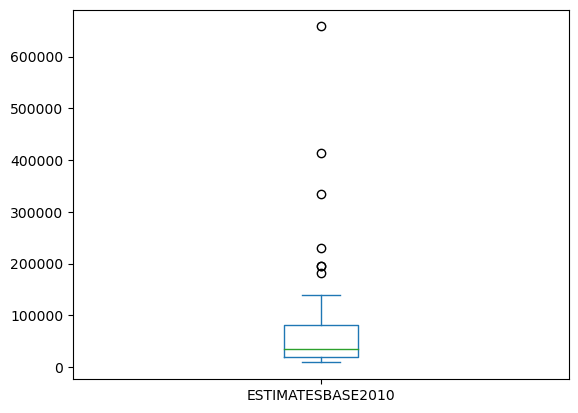

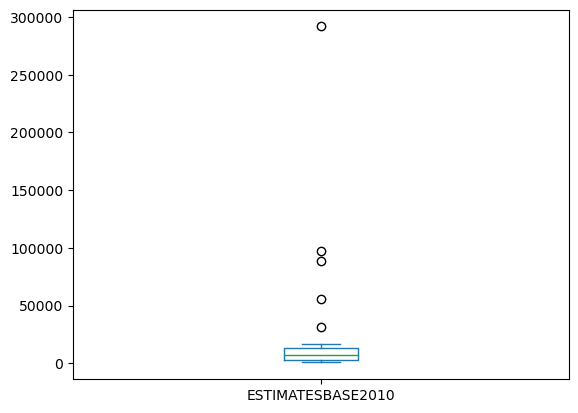

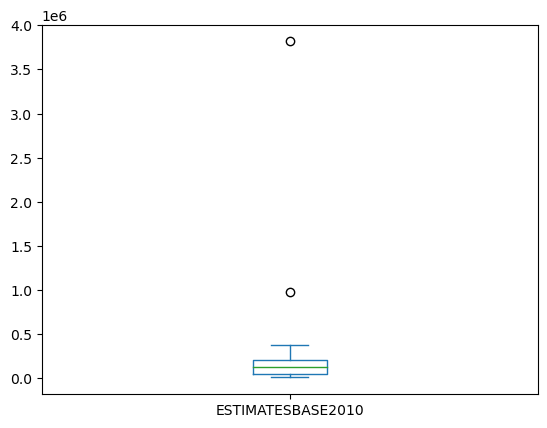

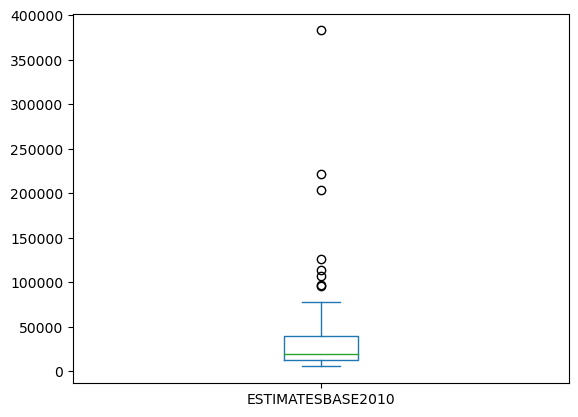

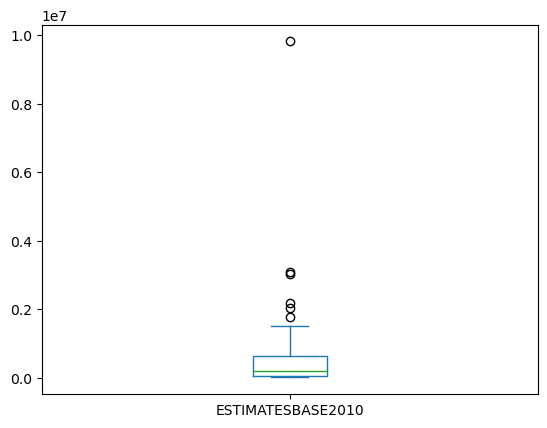

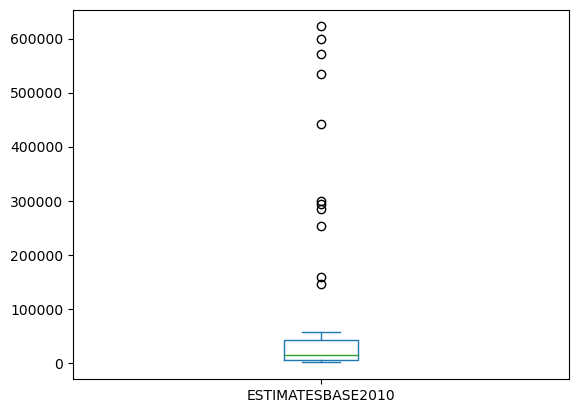

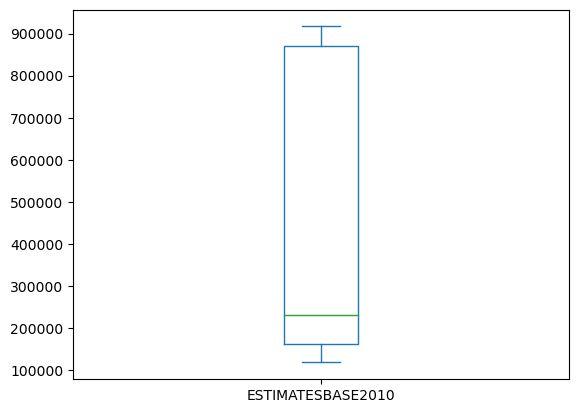

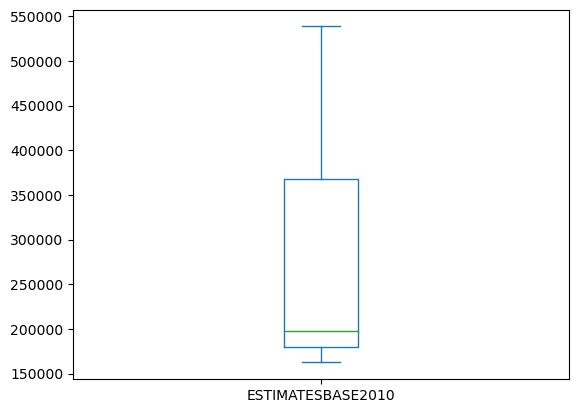

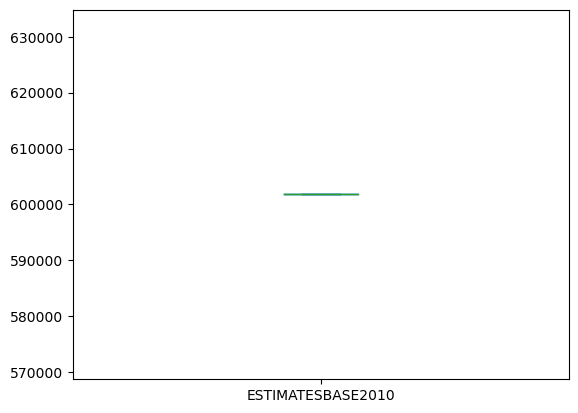

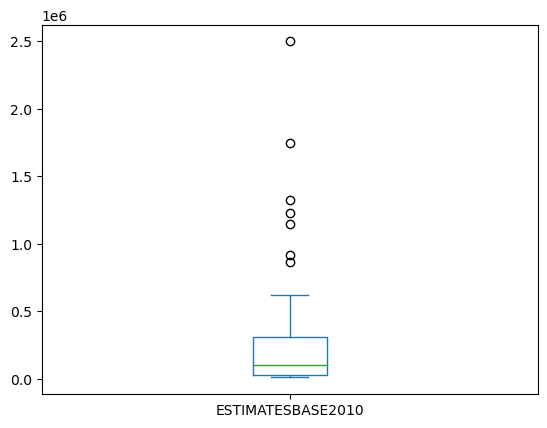

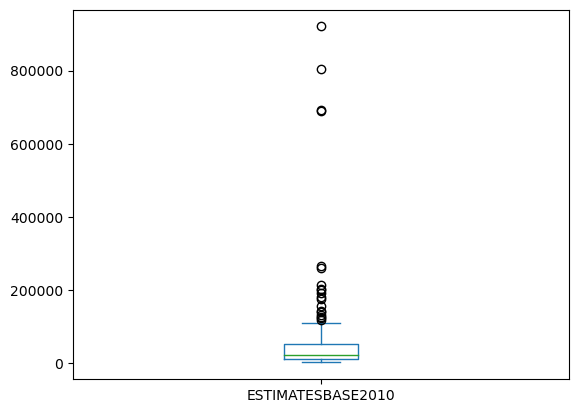

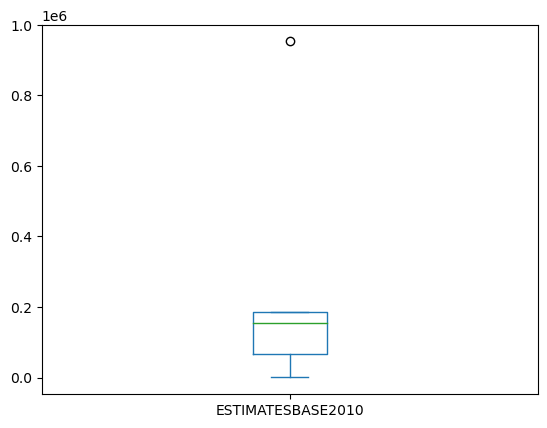

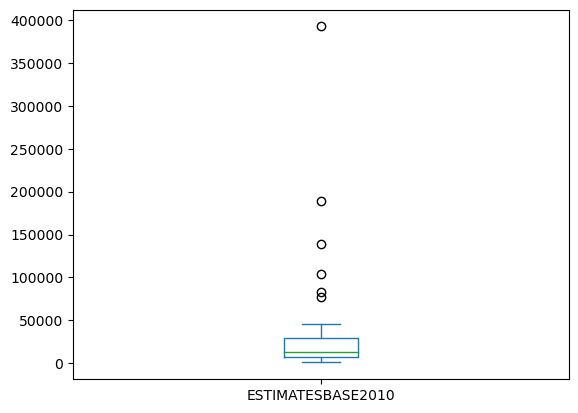

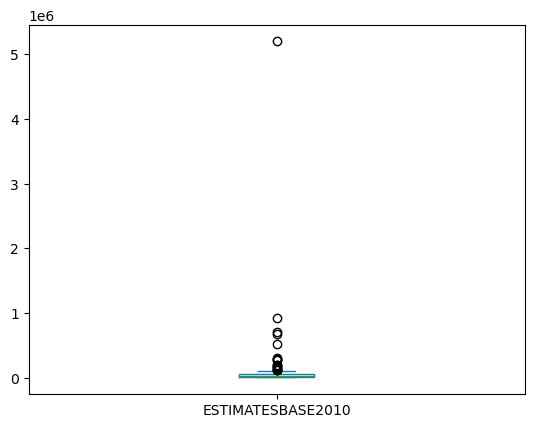

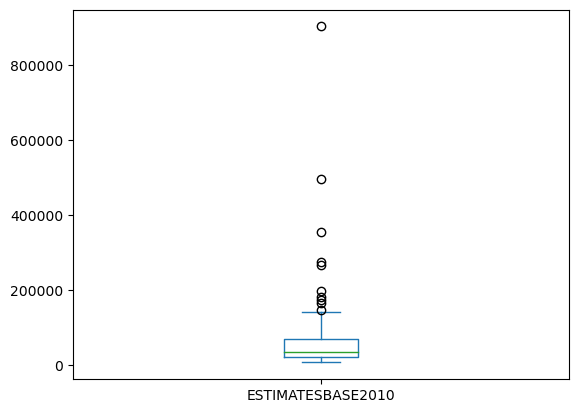

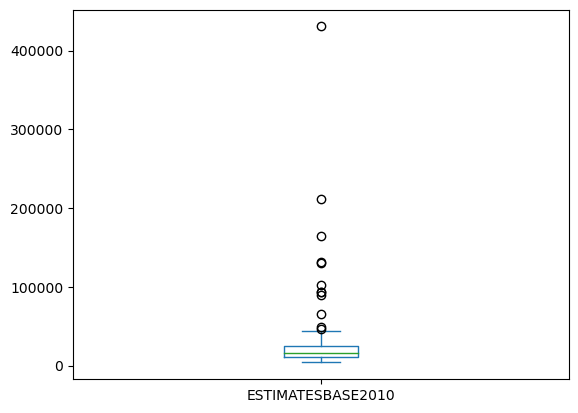

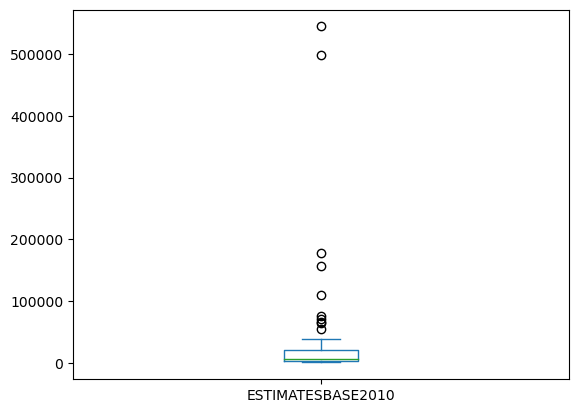

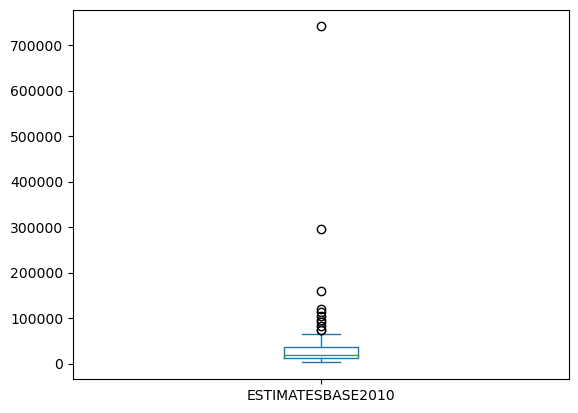

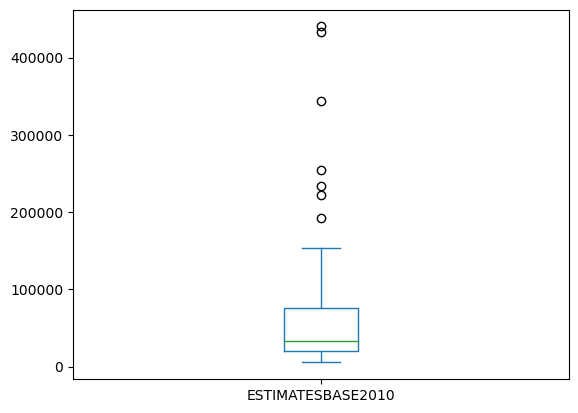

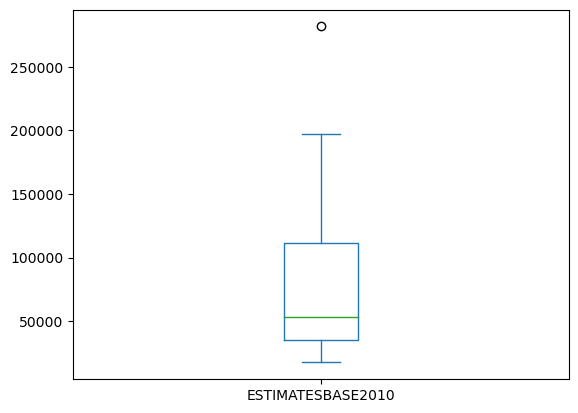

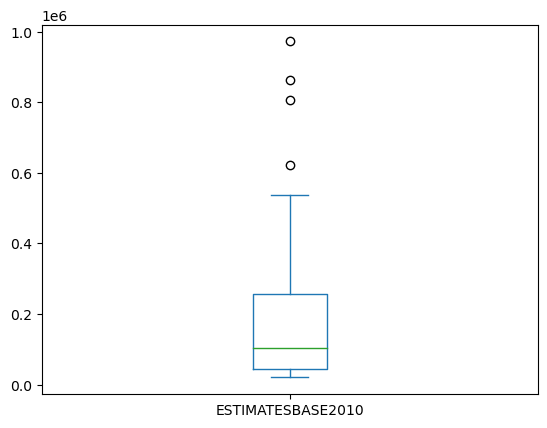

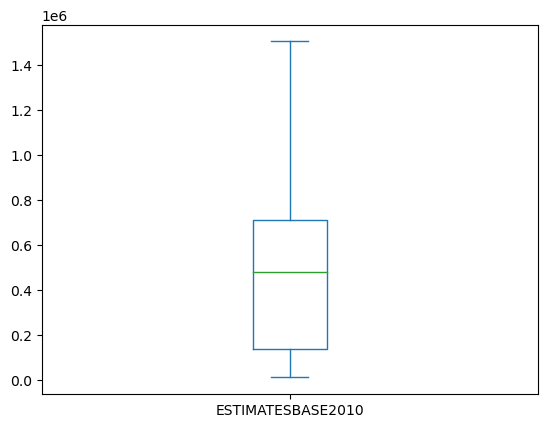

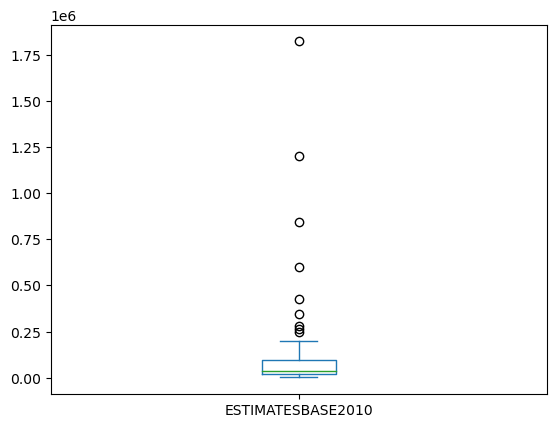

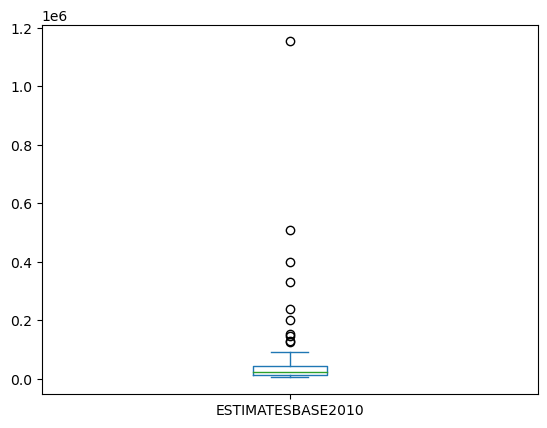

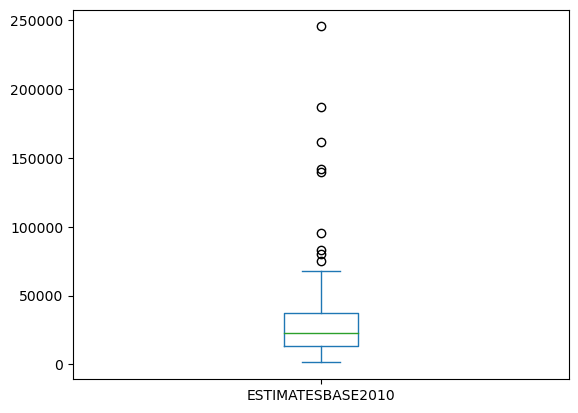

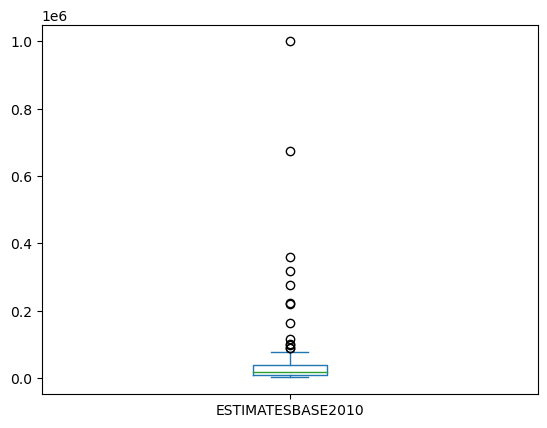

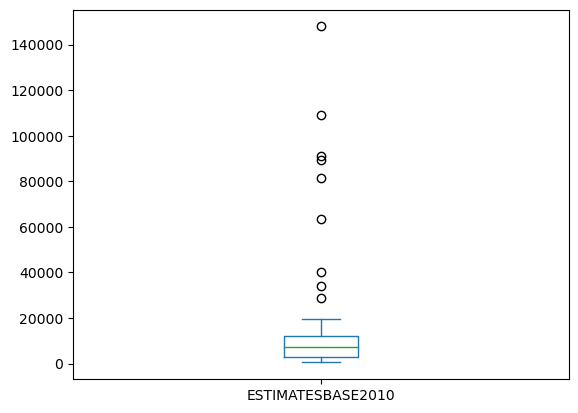

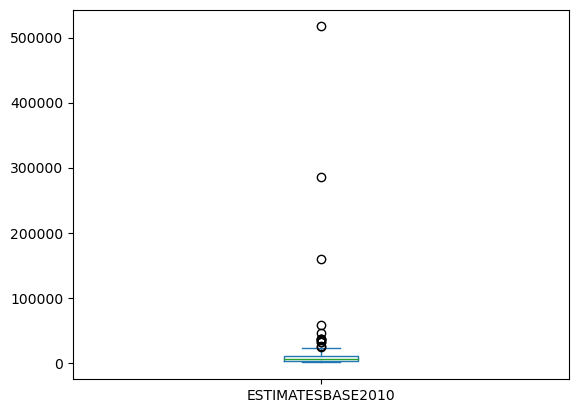

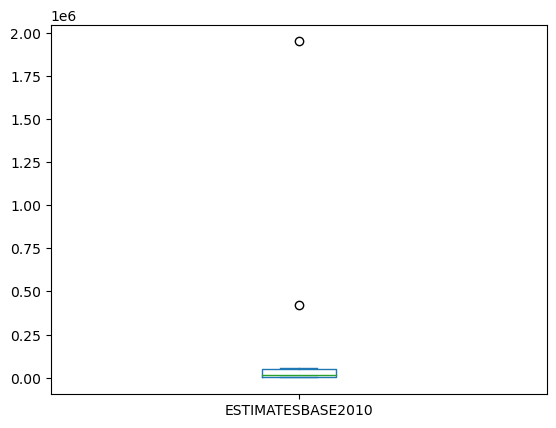

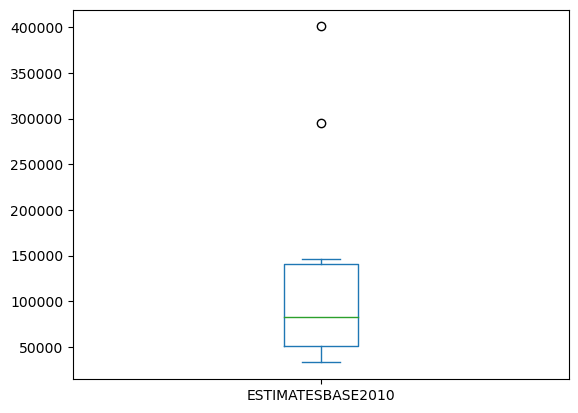

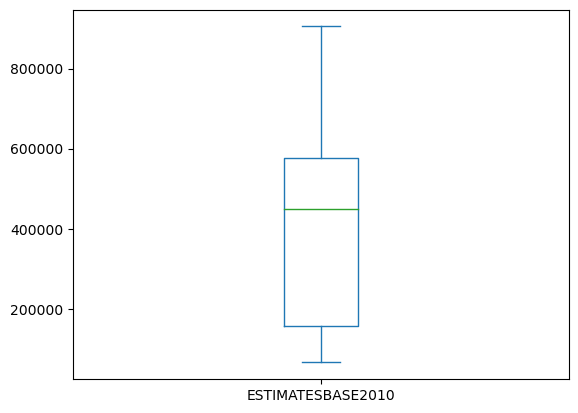

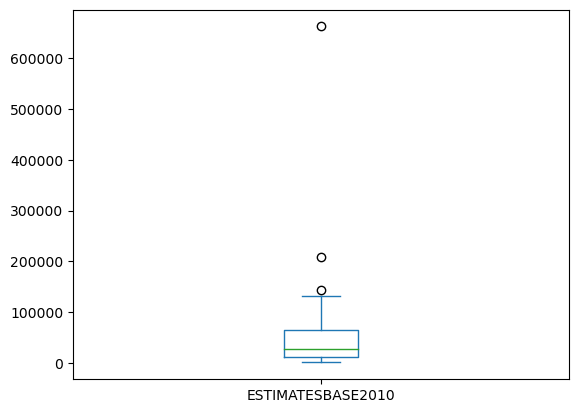

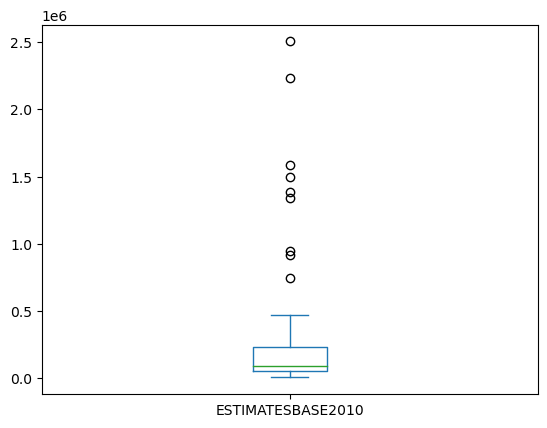

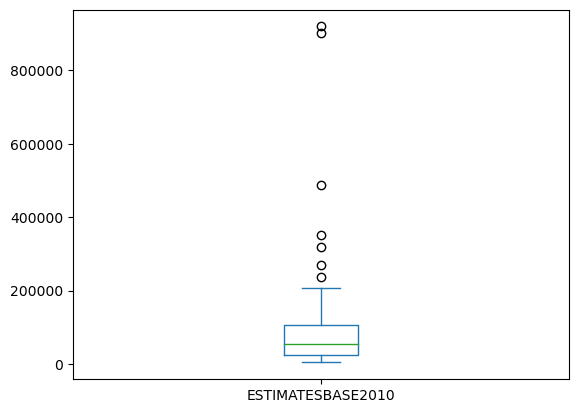

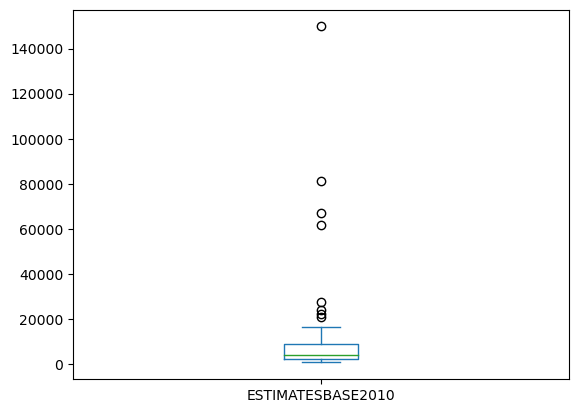

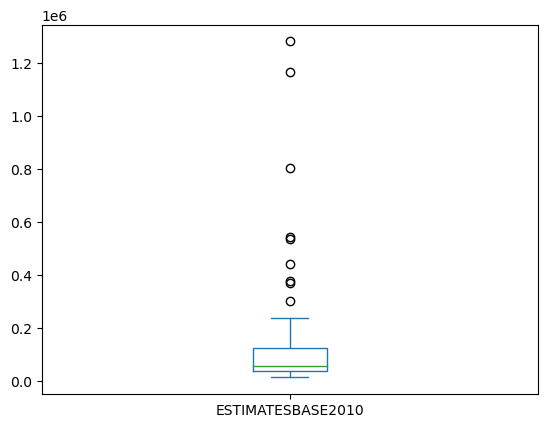

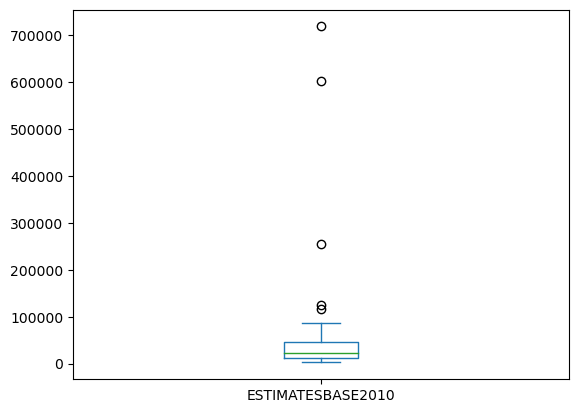

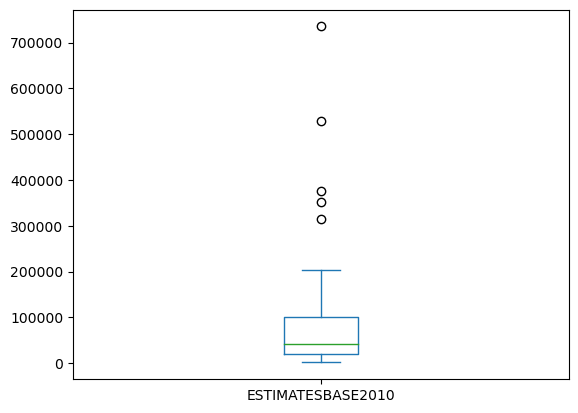

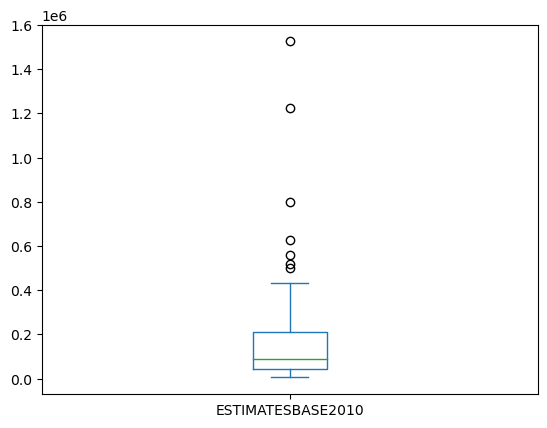

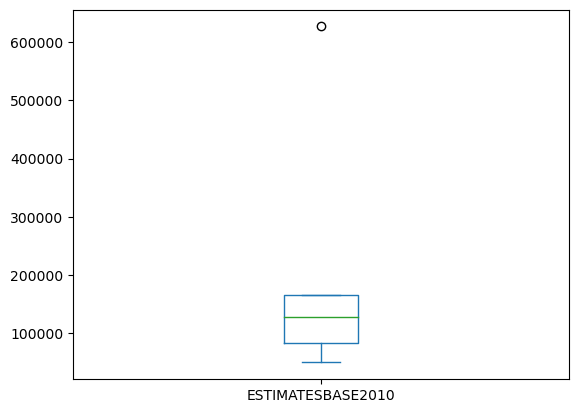

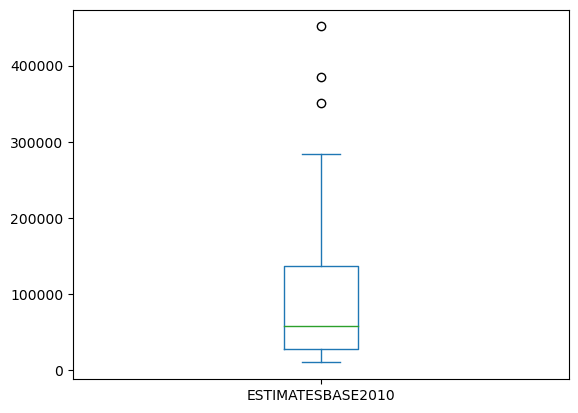

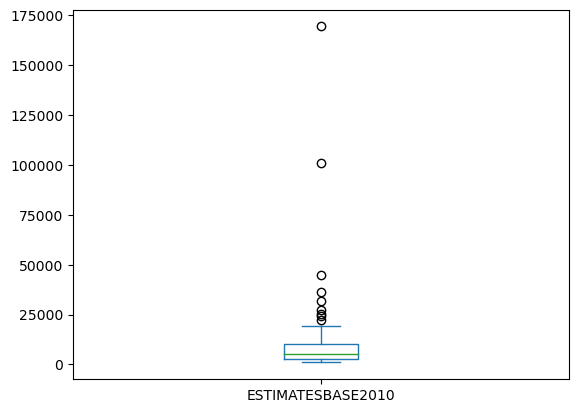

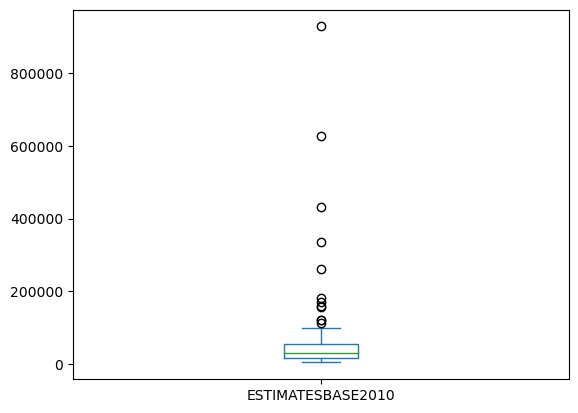

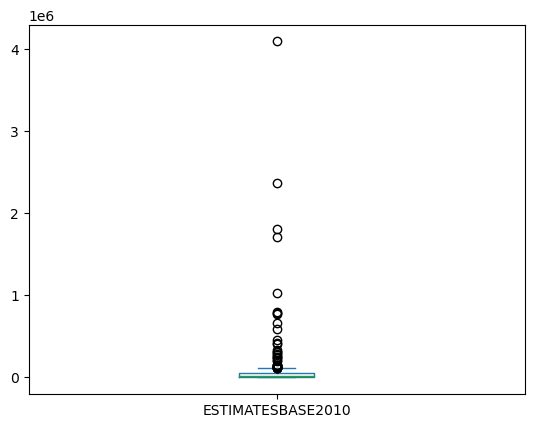

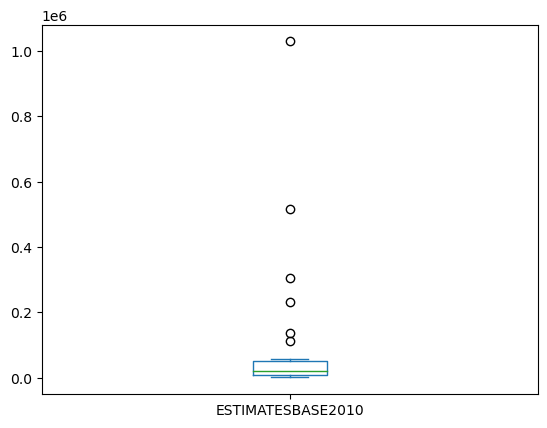

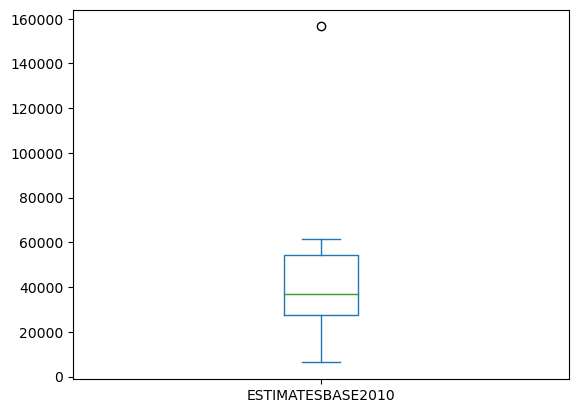

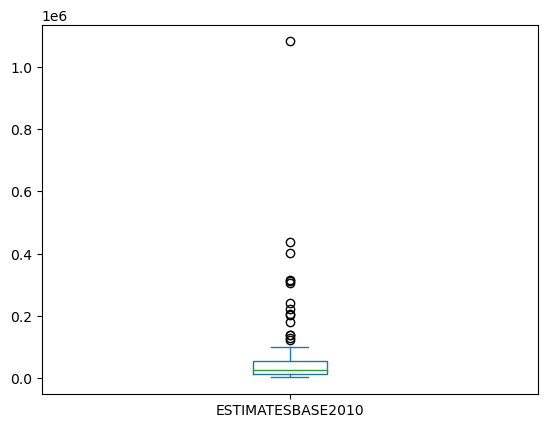

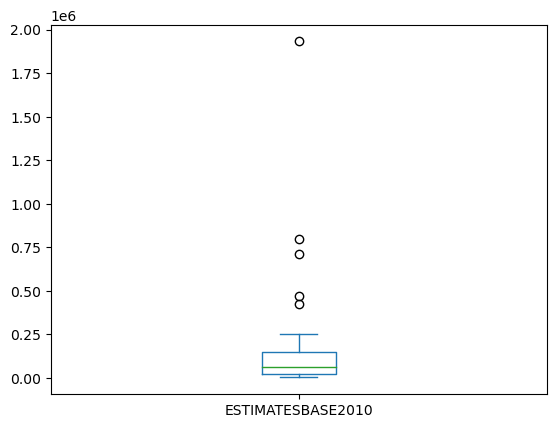

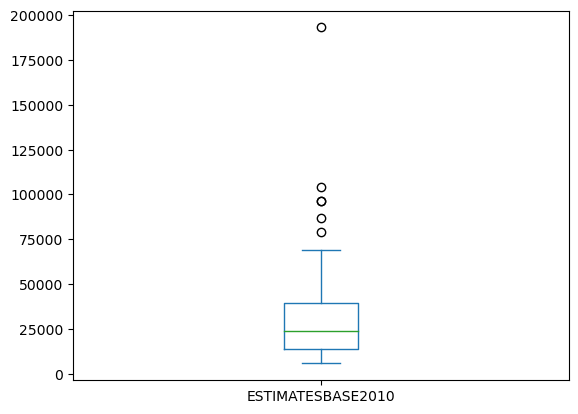

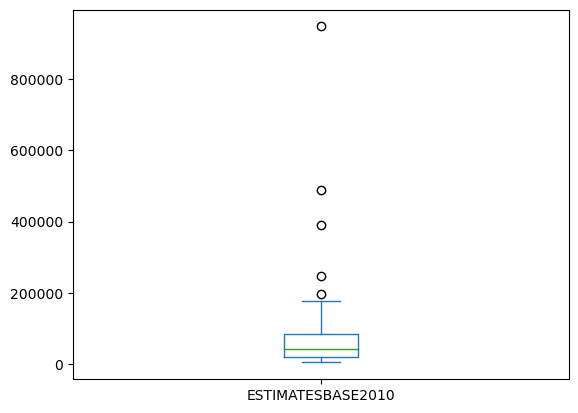

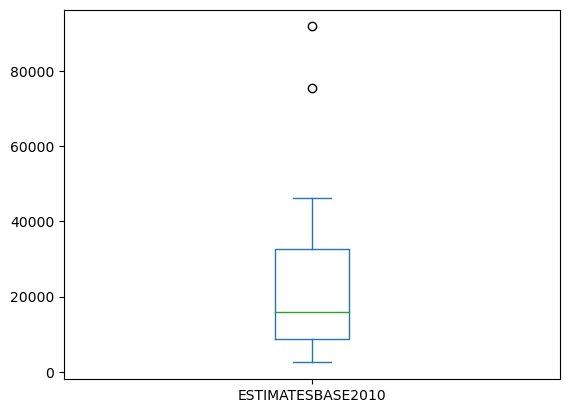

In [51]:

df_state[['ESTIMATESBASE2010']].groupby(level='STNAME').plot.box()

# Methods

In [52]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
# List all methods and attributes of the DataFrame
all_methods_and_attributes = dir(df)

# To print or process this list, you can simply iterate over it
for item in all_methods_and_attributes:
    print(item)

A
B
T
_AXIS_LEN
_AXIS_ORDERS
_AXIS_TO_AXIS_NUMBER
_HANDLED_TYPES
__abs__
__add__
__and__
__annotations__
__array__
__array_priority__
__array_ufunc__
__bool__
__class__
__contains__
__copy__
__dataframe__
__deepcopy__
__delattr__
__delitem__
__dict__
__dir__
__divmod__
__doc__
__eq__
__finalize__
__floordiv__
__format__
__ge__
__getattr__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__iadd__
__iand__
__ifloordiv__
__imod__
__imul__
__init__
__init_subclass__
__invert__
__ior__
__ipow__
__isub__
__iter__
__itruediv__
__ixor__
__le__
__len__
__lt__
__matmul__
__mod__
__module__
__mul__
__ne__
__neg__
__new__
__nonzero__
__or__
__pos__
__pow__
__radd__
__rand__
__rdivmod__
__reduce__
__reduce_ex__
__repr__
__rfloordiv__
__rmatmul__
__rmod__
__rmul__
__ror__
__round__
__rpow__
__rsub__
__rtruediv__
__rxor__
__setattr__
__setitem__
__setstate__
__sizeof__
__str__
__sub__
__subclasshook__
__truediv__
__weakref__
__xor__
_accessors
_accum_func
_add_numeric_operations
_agg_example

In [53]:
#getting help directly in your notebook
help(df.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: 'DropKeep' = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.
    
        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.
    
    inplace : bool, default ``False``
        Whether to modif

In [54]:
#useful methods
AdmissionDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GRE Score                 400 non-null    int64  
 1   TOEFL Score               400 non-null    int64  
 2   University Rating         400 non-null    int64  
 3   Statement of Purpose      400 non-null    float64
 4   Letter of Recommendation  400 non-null    float64
 5   CGPA                      400 non-null    float64
 6   Research                  400 non-null    int64  
 7   Chance of Admit           400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


# Basic statistics

In [55]:
#Remember our Admission dataset?
AdmissionDF


,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recommendation,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


## Correlation

In [56]:
# Using the pearson correlation function one can easily check how similar two variables are:
# Remember how to get help in a function?
help(AdmissionDF.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'CorrelationMethod' = 'pearson', min_periods: 'int' = 1, numeric_only: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and S

In [57]:
print('Correlation between GRE and admission probability ',AdmissionDF['GRE Score'].corr(AdmissionDF['Chance of Admit']))
print('Correlation between GRE Score and LOR',AdmissionDF['GRE Score'].corr(AdmissionDF['Letter of Recommendation']))
print('Correlation between University Rating and LOR',AdmissionDF['University Rating'].corr(AdmissionDF['Letter of Recommendation']))


Correlation between GRE and admission probability  0.8026104595903503
Correlation between GRE Score and LOR 0.5575545239036993
Correlation between University Rating and LOR 0.6601234509614523


## T-tests

In [58]:
import numpy as np
from scipy import stats

# Generating artificial data
group1 = np.random.normal(1, 1, 100)
group2 = np.random.normal(1.1, 1, 100)
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: 1.9223231818339424
p-value: 0.056000363054038875


In [59]:
# But what happens when we have too much data

group1 = np.random.normal(1, 1, 1000)
group2 = np.random.normal(1.1, 1, 1000)
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -2.3600640284155516
p-value: 0.01836742350354317


In [60]:
# But what happens when we have too much data

# Loop over different data sizes (100, 1000, 10000, 100000)
for exponent in range(2, 8):
    n = 10 ** exponent    # Generate two normally distributed datasets
    group1 = np.random.normal(1, 1, n)
    group2 = np.random.normal(1.001, 1, n)

    # Perform an independent t-test
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    # Print the results
    print(f"Data Points: {n}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}\n")


Data Points: 100
T-statistic: -0.3271288349471783
P-value: 0.7439160237794558

Data Points: 1000
T-statistic: 0.5781808359413496
P-value: 0.5632071945117362

Data Points: 10000
T-statistic: 0.15798804745925082
P-value: 0.8744678123257741

Data Points: 100000
T-statistic: 0.11015381014217356
P-value: 0.9122875039651801

Data Points: 1000000
T-statistic: -0.7346367388110361
P-value: 0.46256084318511936

Data Points: 10000000
T-statistic: -2.1201913582282264
P-value: 0.03398992318208883



# Final challenge - Mean square displacement, random walk

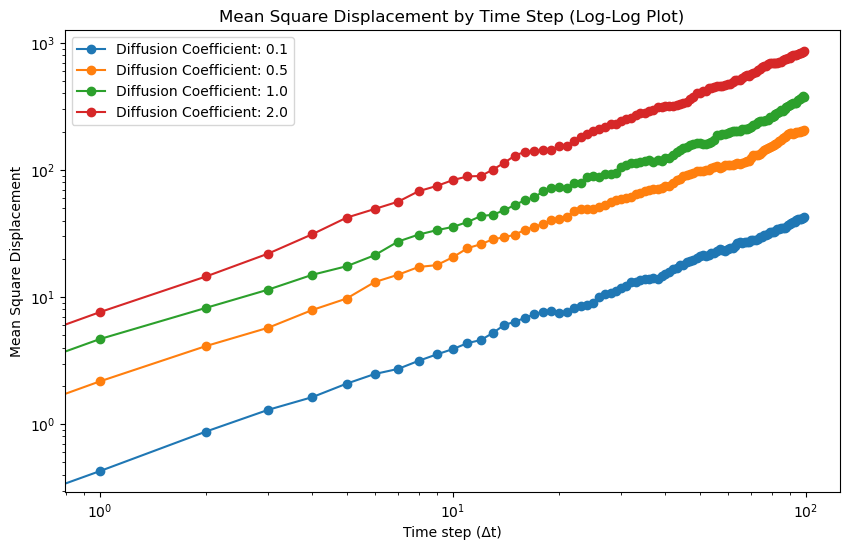

In [2]:
##Fill out the 4 XXX_Your_Answer_Here_XXX fields
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_walkers(n_walkers, diffusion_coefficient, n_steps):
    """
    Generate random walkers.

    Args:
    n_walkers (int): Number of random walkers.
    diffusion_coefficient (float): Diffusion coefficient for the random walk.
    n_steps (int): Number of steps for each walker.

    Returns:
    DataFrame: Pandas DataFrame containing the walker ID, step number, and x, y positions.
    """
    # Generate random steps for each walker
    steps = np.random.normal(loc=0, scale=np.sqrt(2 * diffusion_coefficient), size=(n_walkers, n_steps, 2))
    paths = np.cumsum(steps, axis=1)  # Cumulative sum to get the path

    # Creating a multi-index using the product of the number of walkers and the number of steps.
    # This creates a hierarchical index (WalkerID, Step) for the DataFrame.
    multi_index = pd.MultiIndex.from_product([range(n_walkers), range(n_steps)], names=['WalkerID', 'Step'])

    # Reshape the paths array to a 2D array suitable for a DataFrame
    # and create the DataFrame with the multi-index.
    df = pd.DataFrame(paths.reshape(-1, 2), index=multi_index, columns=['X', 'Y'])

    return df

def calculate_msd_by_t(df, n_steps):
    """
    Calculate the mean square displacement by time step.

    Args:
    df (DataFrame): DataFrame containing walker data.
    n_steps (int): Number of steps.

    Returns:
    DataFrame: DataFrame with mean square displacement for each time step.
    """
    # Use transform('first') to align each walker's start position to the origin (0,0).
    # This subtracts the initial position of each walker from all its positions.
    displacement_sq = (df - df.groupby(level='WalkerID').transform('first'))**2

    # Sum the squared displacements in x and y, then calculate the mean for each time step.
    msd_by_t = displacement_sq.sum(axis=1).groupby('Step').mean()

    return msd_by_t

def plot_msd_by_t(msds, title):
    """
    Plot the mean square displacement by time step in a log-log plot.

    Args:
    msds (list of DataFrames): List of DataFrames containing MSD for different diffusion coefficients.
    title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 6))
    for msd, label in msds:
        plt.loglog(msd.index, msd, marker='o', linestyle='-', label=f'Diffusion Coefficient: {label}')
    plt.xlabel('Time step (\u0394t)')
    plt.ylabel('Mean Square Displacement')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
diffusion_coefficients = [0.1, 0.5, 1.0, 2.0]
n_walkers = 100
n_steps = 100

msds_by_t = []
for d in diffusion_coefficients:
    df = generate_walkers(n_walkers, d, n_steps)
    msd_by_t = calculate_msd_by_t(df, n_steps)
    msds_by_t.append((msd_by_t, d))

plot_msd_by_t(msds_by_t, 'Mean Square Displacement by Time Step (Log-Log Plot)')

